# As from results, we can see that every small random values are causing Vanishing Gradient Problem


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

In [2]:
X,y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [3]:
X

array([[ 8.30857788e-01, -3.34342282e-01],
       [ 9.91709551e-01,  8.78999659e-01],
       [ 1.10724530e+00, -4.70343756e-01],
       [-1.40899180e-01,  1.03314844e+00],
       [ 4.05592166e-01,  1.32852876e+00],
       [ 1.28895069e+00, -5.24079834e-01],
       [ 1.12079473e+00, -2.72254126e-01],
       [ 1.06593729e-01,  1.21210782e+00],
       [ 5.20198504e-01,  5.82883348e-01],
       [ 1.70590095e+00, -3.33066121e-01],
       [ 1.01561986e+00,  2.73026004e-02],
       [-5.22698706e-01,  3.81315376e-01],
       [ 1.69803483e+00, -6.18298670e-01],
       [ 2.41387822e-01,  7.07334462e-01],
       [ 1.34611143e+00, -5.07042180e-01],
       [ 1.27539204e+00, -5.22307686e-01],
       [ 1.98071107e+00,  3.48378058e-01],
       [ 9.39366864e-01,  4.68451809e-01],
       [ 6.62788578e-01, -6.14652226e-01],
       [ 1.73235560e+00, -3.06407313e-01],
       [ 1.92000739e+00,  2.77147626e-01],
       [ 2.20364555e+00,  4.45032301e-01],
       [-2.36031096e-01,  2.03082090e-01],
       [ 9.

In [4]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

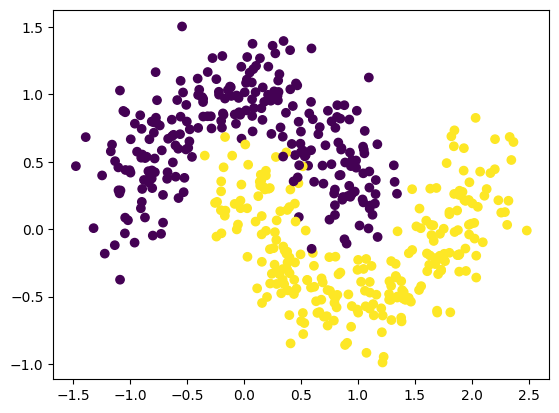

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

# Problem with Sigmoid

In [56]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
initial_weights = model.get_weights()

In [58]:
len(initial_weights)

10

In [59]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])*0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])*0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])*0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])*0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])*0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [60]:
model.set_weights(initial_weights)

In [61]:
model.get_weights()

[array([[-0.00208573,  0.00997073],
        [-0.0064129 , -0.0095531 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01929527, -0.00482512],
        [-0.02448391, -0.00387837]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00045176, -0.0078825 ],
        [ 0.00280779, -0.0049139 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01770979,  0.01357615],
        [-0.00156355,  0.00304341]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00470776],
        [ 0.02024027]], dtype=float32),
 array([0.], dtype=float32)]

In [62]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history = model.fit(X,y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4488 - loss: 0.6937 - val_accuracy: 0.4500 - val_loss: 0.6945
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5108 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6952
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4889 - loss: 0.6938 - val_accuracy: 0.4500 - val_loss: 0.6961
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5192 - loss: 0.6924 - val_accuracy: 0.4500 - val_loss: 0.6986
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4976 - loss: 0.6942 - val_accuracy: 0.4500 - val_loss: 0.6950
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5243 - loss: 0.6925 - val_accuracy: 0.4500 - val_loss: 0.6961
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5148 - loss: 0.6928 - val_accuracy: 0.4500 - val_loss: 0.6963
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5155 - loss: 0.6927 - val_accuracy: 0.4500 - 

In [64]:
model.get_weights()

[array([[ 0.45514765,  0.20541666],
        [-1.0952908 , -1.3639228 ]], dtype=float32),
 array([-1.0508664, -1.0662314], dtype=float32),
 array([[2.8774781, 2.8644383],
        [2.8912044, 2.884989 ]], dtype=float32),
 array([-2.7074304, -2.7414105], dtype=float32),
 array([[3.447777 , 3.5544188],
        [3.4600055, 3.5656188]], dtype=float32),
 array([-2.355976, -2.220358], dtype=float32),
 array([[-4.738952 , -4.0492682],
        [-4.7740965, -4.025775 ]], dtype=float32),
 array([2.3127124, 2.7309563], dtype=float32),
 array([[-3.9051197],
        [-4.150617 ]], dtype=float32),
 array([3.4082127], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

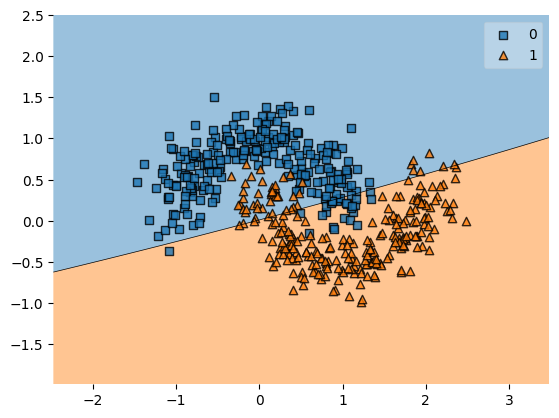

In [65]:
plot_decision_regions(X,y, clf=model)

# Problem with Tanh

In [66]:
model1 = Sequential()

model1.add(Dense(2,activation='tanh',input_dim=2))
model1.add(Dense(2,activation='tanh'))
model1.add(Dense(2,activation='tanh'))
model1.add(Dense(2,activation='tanh'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
initial_weights1 = model1.get_weights()

In [68]:
len(initial_weights)

10

In [69]:
initial_weights1[0] = np.random.randn(model1.get_weights()[0].shape[0],model1.get_weights()[0].shape[1])*0.01
initial_weights1[1] = np.zeros(model1.get_weights()[1].shape)
initial_weights1[2] = np.random.randn(model1.get_weights()[2].shape[0],model1.get_weights()[2].shape[1])*0.01
initial_weights1[3] = np.zeros(model1.get_weights()[3].shape)
initial_weights1[4] = np.random.randn(model1.get_weights()[4].shape[0],model1.get_weights()[4].shape[1])*0.01
initial_weights1[5] = np.zeros(model1.get_weights()[5].shape)
initial_weights1[6] = np.random.randn(model1.get_weights()[6].shape[0],model1.get_weights()[6].shape[1])*0.01
initial_weights1[7] = np.zeros(model1.get_weights()[7].shape)
initial_weights1[8] = np.random.randn(model1.get_weights()[8].shape[0],model1.get_weights()[8].shape[1])*0.01
initial_weights1[9] = np.zeros(model1.get_weights()[9].shape)

In [70]:
model1.set_weights(initial_weights1)

In [71]:
model1.get_weights()

[array([[ 0.01331529,  0.00388213],
        [ 0.00049196, -0.00598307]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.0059432 ,  0.01229768],
        [ 0.00742413,  0.00400953]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.0143617 , 0.00620742],
        [0.01703654, 0.00483059]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01203746,  0.00397019],
        [ 0.00968582, -0.00668425]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01116901],
        [ 0.00331022]], dtype=float32),
 array([0.], dtype=float32)]

In [72]:
adam = Adam(learning_rate=0.01)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
history1 = model1.fit(X,y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5572 - loss: 0.6930 - val_accuracy: 0.4500 - val_loss: 0.6968
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4946 - loss: 0.6939 - val_accuracy: 0.4500 - val_loss: 0.6950
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5325 - loss: 0.6923 - val_accuracy: 0.4500 - val_loss: 0.6962
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5090 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6962
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4976 - loss: 0.6936 - val_accuracy: 0.4500 - val_loss: 0.6929
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6040 - loss: 0.6814 - val_accuracy: 0.8300 - val_loss: 0.6208
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8118 - loss: 0.5792 - val_accuracy: 0.8400 - val_loss: 0.4767
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8658 - loss: 0.4379 - val_accuracy: 0.8200 -

In [74]:
model1.get_weights()

[array([[-0.12384754, -0.12712392],
        [ 0.5159916 ,  0.51793104]], dtype=float32),
 array([0.02131315, 0.0403219 ], dtype=float32),
 array([[-0.37661445, -0.36356983],
        [-0.3755651 , -0.3879936 ]], dtype=float32),
 array([-0.04134795, -0.03966671], dtype=float32),
 array([[-0.55327755, -0.552278  ],
        [-0.5498366 , -0.5537577 ]], dtype=float32),
 array([-0.03221006, -0.02552661], dtype=float32),
 array([[-0.9129107,  0.9403737],
        [-0.9238593,  0.9453471]], dtype=float32),
 array([ 0.1418611 , -0.02589023], dtype=float32),
 array([[ 3.5212984],
        [-3.437538 ]], dtype=float32),
 array([0.2073925], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

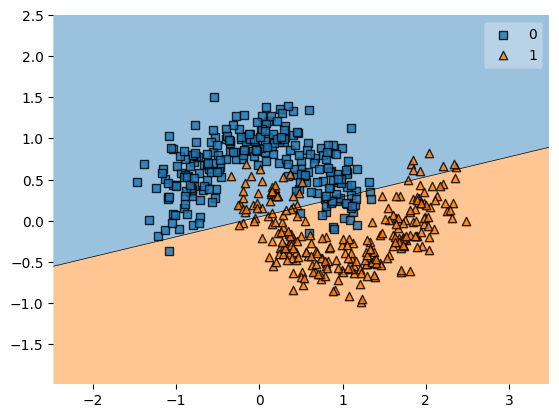

In [75]:
plot_decision_regions(X,y, clf=model1)